# The Data Science Ecosystem

> What makes Python a great choice for data science is its ecosystem: This tutorial provides an overview of popular data science packages.
> 
> **Author**: Bjarne C. Hiller

## matplotlib

Data visualization is an important part of the Data Science process, since it helps you to understand your data and communicate your results.
Inspired by MATLAB, Matplotlib provides powerful plotting tools in Python.
Let's have a look how to use them:

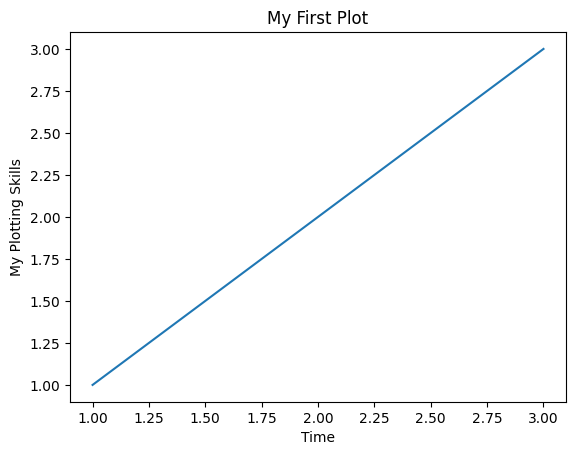

In [1]:
import matplotlib.pyplot as plt

plt.plot([1,2,3], [1,2,3])
plt.title("My First Plot")
plt.xlabel("Time")
plt.ylabel("My Plotting Skills")
plt.show()

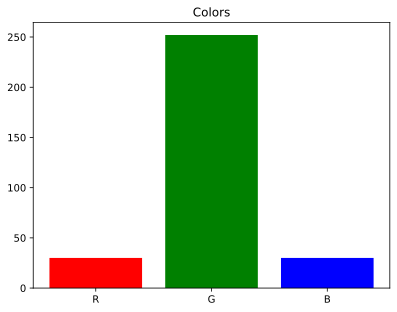

In [29]:
# matplotlib has a functional and a object oriented interface
# axes objects refer to a specific plot
ax = plt.subplot()
ax.bar(["R", "G", "B"], [30, 252, 30], color=["r", "g", "b"])
ax.set_title("Colors")
plt.show()

For reference, you can have a look at [Matplotlib's Cheatsheet'](https://matplotlib.org/cheatsheets/cheatsheets.pdf)!

## NumPy

Machine Learning methods are built on top of mathematical theories, usually requiring a lot of linear algebra and statistics.
That means, we need methods to handle vectors, matrices and tensors. 
Let's try out, if lists in Python can be used for vector addition:

In [24]:
# define vectors
x = [1,2,3]
y = [4,5,6]

# combines lists instead of adding elements
print(x + y)

[1, 2, 3, 4, 5, 6]


Adding 2 lists in Python just concatenates them. We need something else for vector addition.

```
> Implement a method that adds 2 lists!
```

In [30]:
def add_lists(list1, list2):
    """Adds lists elementwise."""
    assert len(list1) == len(list2)
    # TODO: add list elements together
    raise NotImplementedError("TODO")

add_lists([1,2,3], [4,5,6])

NotImplementedError: TODO

In [5]:
def add_lists(list1, list2):
    assert len(list1) == len(list2)
    # add list elements together
    return [l1+l2 for (l1,l2) in zip(list1, list2)]

add_lists([1,2,3], [4,5,6])

[5, 7, 9]

Great, we have something like vector addition - but there is still so much missing...

[NumPy](https://numpy.org/) provides multi-dimensional arrays to handle high-dimensional data, making linear algebra computations in Python a lot easier.
Therefore, many Python packages are using NumPy internally - at some point, NumPy was even considered to be included into Python's standard library.

Let's start by creating some Arrays:

In [6]:
import numpy as np

x = np.array([1,2,3])
y = np.array([4,5,6])

# we can directly add numpy arrays
x + y

array([5, 7, 9])

In [7]:
# create a numpy array [0,...,9]
n = np.arange(10)
n

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

> Use Numpy and Matplotlib to plot a sine and cosine curve!

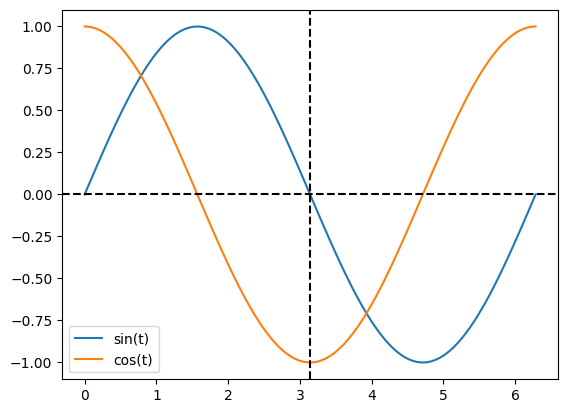

In [8]:
t = np.linspace(0, 2 * np.pi, 100)

plt.plot(t, np.sin(t), label="sin(t)")
plt.plot(t, np.cos(t), label="cos(t)")

plt.axvline(np.pi, ls="--", color="k")
plt.axhline(0, ls="--", color="k")

plt.legend()
plt.show()

## Pandas

Numpy arrays are great - but they would be even better, if we could label the rows and columns of Matrices.
Or have columns with different and annotated data types.
[Pandas](https://pandas.pydata.org/) provides the DataFrame class, which is perfect to hold annotated data sets.

In [9]:
import pandas as pd

data = {
    "name": ["Anna", "Bert", "Claude"],
    "age": [10, 20, 30],
    "weight": [30, 60, 90]
}

df = pd.DataFrame(data)
df.head()

,name,age,weight
0,Anna,10,30
1,Bert,20,60
2,Claude,30,90


Let's compute some statistics:

In [10]:
df.describe()

,age,weight
count,3.0,3.0
mean,20.0,60.0
std,10.0,30.0
min,10.0,30.0
25%,15.0,45.0
50%,20.0,60.0
75%,25.0,75.0
max,30.0,90.0


DataFrames are very flexible, but it might take some time to getting used to them.
Especially the indexing needs some practice:

In [11]:
# access a column by name
age = df["age"]

# access rows by a boolean array
adult = df.loc[age >= 18]

# access rows/columns by index (: is the slice operator)
df.iloc[0,:]

name      Anna
age         10
weight      30
Name: 0, dtype: object

> Access the column `weight` of the first two rows!

In [26]:
df.iloc[0:2]["weight"]

0    30
1    60
Name: weight, dtype: int64

## scikit-learn

By now, we have packages for holding and visualizing data.
But how can we learn from it and predict new points?

[scikit-learn](https://scikit-learn.org) provides (almost) everything you need for machine learning projects, from data preprocess over model training to evaluation metrics.
To put everything together, we will train a simple Decision Tree Classifier for the iris dataset.

In [12]:
from sklearn.datasets import load_iris

# load the dataset
iris_ds = load_iris()
print(iris_ds["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [13]:
# let's convert it into a data frame:
iris_df = pd.DataFrame(iris_ds["data"], columns=iris_ds["feature_names"])

iris_df["target"] = iris_ds["target"]
iris_df["label"] = iris_ds["target_names"][iris_df["target"]]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
print(len(iris_df))

150


Well, we could look at all 150 instances and try out what's going on the hard way - or we could create some helpful visualizations and save a lot of time.
Another package we haven't mentioned yet is [seaborn](https://seaborn.pydata.org/): it builts on top of matplotlib and makes the creation of complex plots a lot easier.

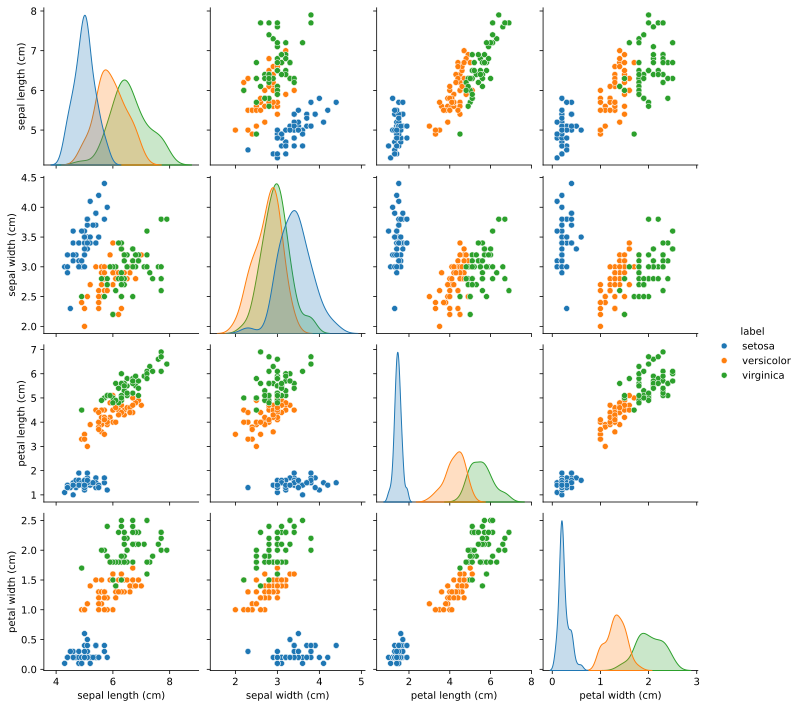

In [27]:
import seaborn

seaborn.pairplot(iris_df.drop("target", axis=1), hue="label");

This is a *pairplot*, that creates a scatterplot for each *pair of features*.
Of course, a scatterplot is a bit boring if we plot the same feature on the x and y axis.
That's why we get *Kernel Density Estimation* (KDE) plots on the diagonal, that approximate the probability distributions of that feature.
So what can we learn from this pairplot?
We have the 3 classes of plant species: `setosa` (blue), `versicolor` (orange) and `virginica` (green).
If we take a closer look at the petal length vs petal width plot (last row, third column), we notice that the `setosa` instances are completely separated from the other 2 classes.

> Based on the feature `petal width`, what would be a good *decision rule* to determine, if a iris plant belongs to the class `setosa`?

> Based on the feature `petal length`, how can we discriminate between `versicolor` and `virginica`?

Intuitively, we could use the following 2 rules for classifcation:

1. If the petal width is less than 1 cm, we predict `setosa`.
2. If the petal length is greater than 5 cm, we predict `virginica`.

Otherwise, we predict `versicolor`.

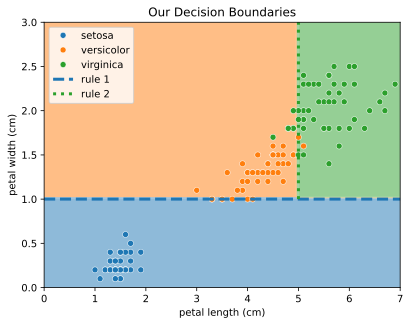

In [160]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["tab:blue", "tab:orange", "tab:green"])

fig, ax = plt.subplots()

xx, yy = np.meshgrid(np.linspace(0,7,100), np.linspace(0,3,100))
zz = np.zeros_like(xx)

zz[yy <= 1] = 0
zz[(xx < 5) & (yy > 1)] = 1
zz[(xx > 5) & (yy > 1)] = 2

ax.contourf(xx, yy, zz, alpha=0.5, cmap=cmap)

seaborn.scatterplot(iris_df, x="petal length (cm)", y="petal width (cm)", hue="label")

plt.axhline(y=1, c="tab:blue", lw=3, ls="--", label="rule 1")

rule_2 = plt.Line2D([5,5], [1,3], lw=3, ls=":", c="tab:green", label="rule 2")
ax.add_line(rule_2)

plt.legend()
plt.title("Our Decision Boundaries")
plt.show()

Now, let's build our first machine learning model and see, if it can find better decision rules.
Therefore, we will use a *Decision Tree*, which works pretty similar to how humans arrive at decisions.
In summary, it sorts each data point into a class by asking a series of Yes/No questions regarding the features.
Don't worry if you still have questions, we will have a closer look at Decision Trees in a later tutorial.

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# get features
X = iris_ds["data"]
X = iris_df[["petal length (cm)", "petal width (cm)"]]

# get target variable
y = iris_df["target"]

# split data into train (80%) and test (20%) part
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

# create our model and fit it
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Great, now we need to evaluate, if the model can generalize on new, unseen data.
That's why we split the test data from the training data in the begining.

In [97]:
y_pred = model.predict(X_test)

But how accurate are the predictions? For that, we need a *Evaluation Metric*, that reflects the performance as a single number.
This allows easy comparisons between different model configurations and architectures.
For classifications, a simple metric is the *Accuracy*, that reflects the relative amount of times how often the model was correct.

$$
    \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{True Positives} + \text{True Negatives} + \text{False Positives} + \text{False Negatives}}
$$

In [99]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {100*acc:.2f} %")

Test Accuracy: 100.00 %


The accuracy looks good, but let's make the results a bit more fancy using visualizations.
For classifications, we can visualize the predictions with a *Confusion Matrix*.

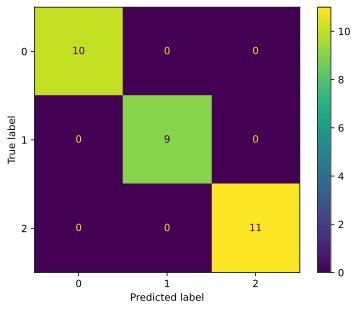

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Finally, let's take a closer look how the Decision Tree makes decisions.
Using the rules, you will be an iris flower expert yourself and impress all your friends from the botanical super friends club.

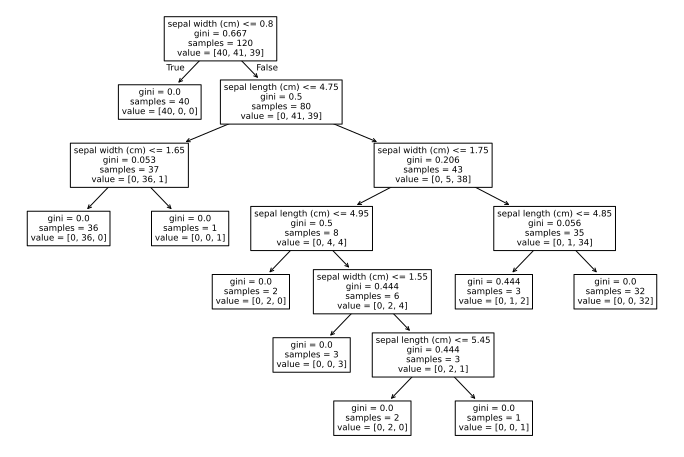

In [101]:
from sklearn.tree import plot_tree

# show plot as svg
%config InlineBackend.figure_formats = ['svg']

# increase figure size
fig, ax = plt.subplots(figsize=(12,8))

plot_tree(model, feature_names=iris_ds["feature_names"], ax=ax);

This plot displays our fitted Decision Tree.
Each box represents a node of that tree.
In each node, we have a certain amount of `samples` left, with a class distribution given in `value`.
At the root node, we start with all 120 samples from the training data set, with 40 `setosa`, 41 `versicolor`, and 39 `virginica` instances.
The first line in each node is a decision rule, that applies a *split criteria* to the samples by asking a simple Yes/No question regarding a certain feature.
To classify an instance, we start at the root node and follow the decision tree until we end at a leaf node
There, we will predict the majority class of remaining samples.

The first rule is pretty similar to the one we came up with in the beginning: `petal width (cm) <= 0.8`. This is true for all 40 `setosa` instances, leaving us at the first leaf node at the left branch.

The next decision rule is also similar to our second rule: `petal length (cm) <= 4.75`, separating `versicolor` and `virginica` instances.
Intuitively, we already did a pretty good job!

The decision tree will now continue, until it ends up with leaf nodes that only contain instances of a single class.

> Is it a problem, if our tree tries to perfectly separate all samples?

The model *overfits* to the data and looses its ability to generalize.

Imagine our model as a school student, who has to learn for an important math exam.
During training, the student will look at the exercises.
If they understand, how a solution was derived for a certain task, they will be able to transfer their knowledge to the exam and perform well. For example, from the task $2 + 2 = 4$, they learned how addition works.

But what happens, if they just memorize the solutions for each training exercise?
They didn't understand how addition works, they just memorized the fact that $2+2=4$.
Of course, the tasks in the exams will be different and if they just write down the solutions from the training exercises, they will most likely fail the exam.

This is called *overfitting*, and is an indicator, that the model is too complex (has to many parameters) for the task it has to solve - in order to just memorize all the solutions, you must be really smart.

To visualize this, let's train another model, but this time, on the `sepal length (cm)` and `sepal width (cm)`.
We will see, that the decision boundaries start to look weird

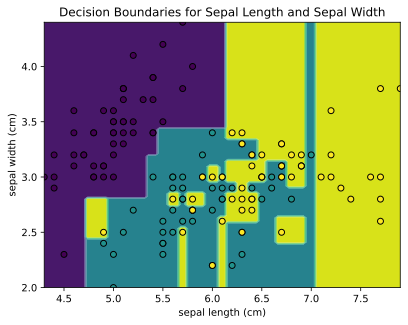

In [141]:
from sklearn.inspection import DecisionBoundaryDisplay

X_sepal = iris_df[["sepal length (cm)", "sepal width (cm)"]].to_numpy()
y_sepal = iris_df["target"]

model_sepal = DecisionTreeClassifier()
model_sepal.fit(X_sepal, y_sepal)

fig, ax = plt.subplots()
xx, yy = np.meshgrid(
    np.linspace(X_sepal[:,0].min(), X_sepal[:,0].max(), 100),
    np.linspace(X_sepal[:,1].min(), X_sepal[:,1].max(), 100)
)

grid = np.stack([xx.ravel(), yy.ravel()], axis=1)
response = model_sepal.predict(grid).reshape(xx.shape)
display = DecisionBoundaryDisplay(xx0=xx, xx1=yy, response=response)
display.plot(ax=ax)

ax.scatter(X_sepal[:,0], X_sepal[:, 1], c=y_sepal, edgecolors="k")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Decision Boundaries for Sepal Length and Sepal Width")
plt.show()

> What is the `gini` value, that is given for each node?
> Compute the value for class frequencies `[40,41,39]`.
>
> See: https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity

The *gini index*, named after the mathematician Corrado Gini, is a measure of class impurity, that the Decision Tree tries to minimize.
It represents, of how often a randomly chosen instance would be incorrectly labeled, if labels were decided randomly according to the relative number of instances of the respective class.

Let $Y$ be a multiset of class labels from the underlying class set $C=\{1, ..., c\}$. Then the relative frequencies $p_i$ of each class $i\in C$ is given by:

$$
    p_i = \frac{|\{y \in Y | y=i\}|}{|Y|}
$$

Then, the gini index $I_G$ can be computed as:

$$
    \begin{align*}
    I_G(p)
        &= \sum_{i=1}^c \left( p_i \sum_{j \neq i} p_j \right)\\
        &= \sum_{i=1}^c p_i (1 - p_i)\\
        &= \sum_{i=1}^c (p_i - p_i^2)\\
        &= \sum_{i=1}^c p_i - \sum_{i=1}^c p_i^2\\
        &= 1 - \sum_{i=1}^c p_i^2
    \end{align*}
$$

A gini index of 0 means, that all instances belong to the same class.

In [149]:
labels = np.array([40,41,39])

def gini(x):
    x = x / x.sum()
    return 1 - np.power(x, 2).sum()

g = gini(labels)

print(f"Gini: {g:.3f}")

Gini: 0.667


## References

- Matplotlib: https://matplotlib.org/
- Numpy: https://numpy.org/
- Pandas: https://pandas.pydata.org/
- seaborn: https://seaborn.pydata.org/ 
- scikit-learn: https://scikit-learn.org
- Gini Impurity: https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity